<a href="https://colab.research.google.com/github/BingHung/AI/blob/master/%5B02192019_2%5D_Tensorflow_Intro_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Activation Function - ReLu
import tensorflow as tf
X=tf.Variable([[0.4,0.2,0.4]])
W=tf.Variable([[-0.5,-0.2],
              [-0.3,0.4],
              [-0.5,0.2]])
b = tf.Variable([[0.1,0.2]])
XWb=tf.matmul(X,W)+b
y=tf.nn.relu(XWb)
with tf.Session() as sess:
  init = tf.global_variables_initializer()
  sess.run(init)
  print(sess.run(XWb))
  print(sess.run(y))

[[-0.36000004  0.28      ]]
[[0.   0.28]]


In [0]:
# Activation Function - Sigmoid
import tensorflow as tf
X=tf.Variable([[0.4,0.2,0.4]])
W=tf.Variable([[-0.5,-0.2],
              [-0.3,0.4],
              [-0.5,0.2]])
b = tf.Variable([[0.1,0.2]])
XWb=tf.matmul(X,W)+b
y=tf.nn.sigmoid(XWb)
with tf.Session() as sess:
  init = tf.global_variables_initializer()
  sess.run(init)
  print(sess.run(XWb))
  print(sess.run(y))

[[-0.36000004  0.28      ]]
[[0.41095954 0.5695462 ]]


In [0]:
W=tf.Variable(tf.random_normal([3,2]))
b=tf.Variable(tf.random_normal([1,2]))
X=tf.Variable([[0.4,0.2,0.4]])
y=tf.nn.relu(tf.matmul(X,W)+b)
with tf.Session() as sess:
  init = tf.global_variables_initializer()
  sess.run(init)
  print('b',sess.run(b))
  print('W',sess.run(W))
  print('y',sess.run(y))

b [[0.26465708 1.0333039 ]]
W [[-0.6039851   0.11012251]
 [-1.2429202   0.40135637]
 [ 1.8823415  -2.0640914 ]]
y [[0.52741563 0.33198756]]


In [0]:
W=tf.Variable(tf.random_normal([3,2]))
b=tf.Variable(tf.random_normal([1,2]))
X=tf.Variable([[0.4,0.2,0.4]])
y=tf.nn.relu(tf.matmul(X,W)+b)
with tf.Session() as sess:
  init = tf.global_variables_initializer()
  sess.run(init)
  (_b,_W,_y)=sess.run((b,W,y))
  print('b',_b)
  print('W',_W)
  print('y',_y)

b [[0.7964451  0.01408898]]
W [[-0.16333356 -0.52103585]
 [ 1.1957899   0.5607855 ]
 [ 0.16757287 -0.8515427 ]]
y [[1.0372988 0.       ]]


In [0]:
ts_norm = tf.random_normal([1000])
with tf.Session() as session:
  norm_data=ts_norm.eval()
print(norm_data[:5])
print(norm_data.shape)

[ 0.24018088 -0.5553535  -1.3912125  -0.3841453  -0.16658594]
(1000,)


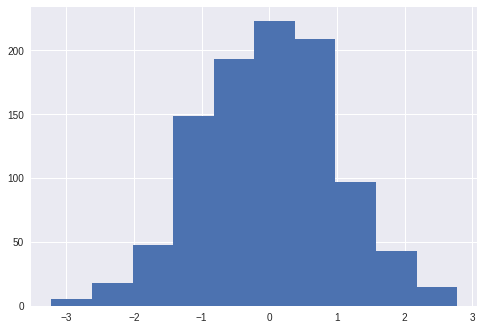

In [0]:
import matplotlib.pyplot as plt
plt.hist(norm_data)
plt.show()

In [0]:
import numpy as np

W=tf.Variable(tf.random_normal([3,2]))
b=tf.Variable(tf.random_normal([1,2]))
X=tf.placeholder('float',[None,3])
y=tf.nn.relu(tf.matmul(X,W)+b)
with tf.Session() as sess:
  init = tf.global_variables_initializer()
  sess.run(init)
  X_array=np.array([[0.4,0.2,0.4]])
  (_b,_W,_X,_y)=sess.run((b,W,X,y),feed_dict ={X:X_array})
  print('b',_b)
  print('W',_W)
  print('X',_X)
  print('y',_y)

b [[ 1.1581337 -1.5345973]]
W [[ 0.32514098 -0.45332602]
 [ 0.37178674 -0.3162016 ]
 [ 0.3107249  -0.70922023]]
X [[0.4 0.2 0.4]]
y [[1.4868374 0.       ]]


In [0]:
W=tf.Variable(tf.random_normal([3,2]))
b=tf.Variable(tf.random_normal([1,2]))
X=tf.placeholder('float',[None,3])
y=tf.nn.relu(tf.matmul(X,W)+b)
with tf.Session() as sess:
  init = tf.global_variables_initializer()
  sess.run(init)
  X_array=np.array([[0.4,0.2,0.4],
                   [0.3,0.4,0.5],
                   [0.3,-0.4,0.5]])
  (_b,_W,_X,_y)=sess.run((b,W,X,y),feed_dict ={X:X_array})
  print('b',_b)
  print('W',_W)
  print('X',_X)
  print('y',_y)

b [[ 0.73516285 -0.00957461]]
W [[-0.33225957  0.66506517]
 [-2.1494374  -1.6883054 ]
 [ 1.4116973  -1.0871944 ]]
X [[ 0.4  0.2  0.4]
 [ 0.3  0.4  0.5]
 [ 0.3 -0.4  0.5]]
y [[0.7370504  0.        ]
 [0.48155862 0.        ]
 [2.2011085  0.3216699 ]]


# MLP Implement V1


In [0]:
def layer(output_dim,input_dim,inputs,activation=None):
  W=tf.Variable(tf.random_normal([input_dim,output_dim]))
  b=tf.Variable(tf.random_normal([1,output_dim]))
  XWb=tf.matmul(inputs,W)+b
  if activation is None:
    outputs = XWb
  else:
    outputs=activation(XWb)
  return outputs

In [0]:
X=tf.placeholder("float",[None,4])
h=layer(output_dim=3,input_dim=4,inputs=X,activation=tf.nn.relu)
y=layer(output_dim=2,input_dim=3,inputs=h)

with tf.Session() as sess:
  init = tf.global_variables_initializer()
  sess.run(init)
  X_array=np.array([[0.4,0.2,0.4,0.5]])
  (layer_X,layer_h,layer_y)=sess.run((X,h,y),feed_dict ={X:X_array})
  print('input layer X:',layer_X)
  print('input layer h:',layer_h)
  print('input layer y:',layer_y)

input layer X: [[0.4 0.2 0.4 0.5]]
input layer h: [[0.         0.51765585 0.5633921 ]]
input layer y: [[-1.1506873  1.6201   ]]


# MLP Implement V2

In [0]:
def layer(output_dim,input_dim,inputs,activation=None):
  W=tf.Variable(tf.random_normal([input_dim,output_dim]))
  b=tf.Variable(tf.random_normal([1,output_dim]))
  XWb=tf.matmul(inputs,W)+b
  if activation is None:
    outputs = XWb
  else:
    outputs=activation(XWb)
  return outputs,W,b

In [0]:
X=tf.placeholder("float",[None,4])
h,W1,b1=layer(output_dim=3,input_dim=4,inputs=X,activation=tf.nn.relu)
y,W2,b2=layer(output_dim=2,input_dim=3,inputs=h)

with tf.Session() as sess:
  init = tf.global_variables_initializer()
  sess.run(init)
  X_array=np.array([[0.4,0.2,0.4,0.5]])
  (layer_X,layer_h,layer_y,W1,b1,W2,b2)=sess.run((X,h,y,W1,b1,W2,b2),feed_dict ={X:X_array})
  print('input layer X:'),print(layer_X)
  print('W1:'),print(W1)
  print('b1:'),print(b1)
  print('input layer h:'),print(layer_h)
  print('W1:'),print(W2)
  print('b1:'),print(b2)
  print('input layer y:'),print(layer_y)

input layer X:
[[0.4 0.2 0.4 0.5]]
W1:
[[-0.08329075 -2.209836   -1.6038718 ]
 [ 0.5023623   0.78758204  0.05365906]
 [-0.53270847  1.0173655   2.2033465 ]
 [-0.5643595  -0.68804467 -1.4821205 ]]
b1:
[[ 0.84495664  0.4825831  -0.09876706]]
input layer h:
[[0.41684967 0.         0.        ]]
W1:
[[ 0.15367742 -0.43727764]
 [-0.07475688 -0.52951527]
 [ 1.088608    2.2846086 ]]
b1:
[[0.6759675  0.53916687]]
input layer y:
[[0.7400279  0.35688782]]


In [0]:
0.41684967* 0.15367742+0.6759675

0.7400278818134515

In [0]:
0.41684967*-0.43727764+0.53916687

0.35688783006762115